In [21]:
#interface graphique 
import tkinter as tk
from tkinter import ttk
import pprint
import random
import time
import re
import matplotlib.pyplot as plt
#import de notebook
import nbimporter
from snake_ia import Snake_ia
import sys

<h2><b>GAME</b></h2>

In [38]:
#classe principale 
class Snake_game :
    def __init__(self, tinker, size = 400, play_btn = True, game_speed = 1, ia_id = 0):
        #initialisation des variables
        self.game_size = size
        self.pixel_size = 20
        self.tinker = tinker
        self.game_speed = game_speed
        self.score = 0
        self.move_count = 0
        self.play_mode = 0
        self.apple_position = (0,0)
        self.end = False
        self.ia_id = ia_id
        
        #initialisation fenêtre tkinter
        self.tinker.title("Snake")
        self.tinker.resizable(False, False)
        self.tinker.tk.call("tk", "scaling", 4.0)
        
        #initialisation de la matrice / creation d'une ligne vide
        self.grid_pos = [[] for i in range(0, int(self.game_size / self.pixel_size))]
        self.create_grid()
        
        if self.ia_id != 0:
             self.play()
        
        #booleen pour afficher le bouton play 
        if play_btn and self.ia_id == 0: 
            #bouton jouer
            self.play_button_player = tk.Button(self.tinker, text = "PLAY AS PLAYER", width = 15, height = 3)
            self.play_button_player.pack()
            
            self.play_button_shortest_path = tk.Button(self.tinker, text = "PLAY AS SHORTEST", width = 15, height = 3)
            self.play_button_shortest_path.pack()
            
            self.play_button_evolved_shortest_path = tk.Button(self.tinker, text = "PLAY AS EVOLVED SHORTEST", width = 23, height = 3)
            self.play_button_evolved_shortest_path.pack()
            
            self.play_button_hamiltonian = tk.Button(self.tinker, text = "PLAY AS HAMILTONIAN", width = 23, height = 3)
            self.play_button_hamiltonian.pack()
            
            self.play_button_player.bind('<Button-1>', self.play)
            self.play_button_shortest_path.bind('<Button-1>', self.play)
            self.play_button_evolved_shortest_path.bind('<Button-1>', self.play)
            self.play_button_hamiltonian.bind('<Button-1>', self.play)
            
    def create_canvas(self) :
        #canvas
        canvas = tk.Canvas(self.tinker, width = self.game_size, height = self.game_size, background = "black", highlightthickness = 0)
        return canvas
          
    def create_grid(self) :        
        #initialisation d'un dictionnaire
        pos_dict = {}             
        #remplir chaque ligne avec une liste de tuple de coordonnées possibles  
        for x in range(0, self.game_size + 1, self.pixel_size) :
            pos_dict[x] = []
            for y in range(0, self.game_size + 1, self.pixel_size) :
                pos_dict[x].append((x, y))

        #création de matrice      
        for x in list(pos_dict.keys())[:-1]:
            for i in range(len(pos_dict[x])-1):
                self.grid_pos[i].append([pos_dict[x][i],pos_dict[x+self.pixel_size][i+1]])
        
    
    def play(self, event = None) :
        play_id = re.search(r'\d+', str(event.widget)) if self.ia_id == 0 else self.ia_id
        if play_id == None :
            self.play_mode = 0
        else :
            play_id = int(play_id.group()) if self.ia_id == 0 else self.ia_id
            if play_id == 2 :
                self.play_mode = 1
            elif play_id == 3 :
                self.play_mode = 2
            elif play_id == 4 :
                self.play_mode = 3
            else :
                self.play_mode = 4
        #print("IA_ID", self.ia_id)
                
        if self.ia_id == 0:
            #retirer les boutons play 
            self.play_button_player.destroy()
            self.play_button_shortest_path.destroy()
            self.play_button_evolved_shortest_path.destroy()
            self.play_button_hamiltonian.destroy()
        
        #initialisation canvas
        self.canvas = self.create_canvas()
        
        #on vérifie si il y a plus de 1 élément fils sur la fenêtre
        if len(self.tinker.winfo_children()) == 1 :
            #initialisation de la pomme
            self.apple_position = (int((self.game_size/self.pixel_size)/2), int((self.game_size/self.pixel_size)/2))
            self.apple = Apple(self.tinker, self.game_size, self.apple_position, self.ia_id)
            self.apple.create_apple(self.canvas)
            
            #initialisation du snake
            self.snake = Snake(self.tinker, self.game_size, self.canvas, self.apple, self.apple_position, self.play_mode, self.ia_id)
            self.snake.init_snake()
            self.canvas.pack()
            
    def return_stats(self):
        global score, move_count
        stats = {
            "score": score,
            "move_count":move_count
                }
        return stats
    
    def game_over(self, canvas):
        global score, move_count
        score = self.score
        move_count = self.move_count    
        #supprimer tous les éléments de tkinter sur le canvas
        canvas.delete(tk.ALL)

        #créer un champs de texte au milieu de l'écran
        canvas.create_text(
            canvas.winfo_width() / 2,
            canvas.winfo_height() / 2,
            text=f"GAME OVER ! Vous avez remporté {self.score} point(s).",
            fill="#FFFFFF",
            font=("Helvetica", 20)
        )
        score = self.score
        move_count = self.move_count
        self.end = True
    
        

In [39]:
#TODO set Apple 
class Apple (Snake_game):
    def __init__(self, tinker, game_size, apple_position, ia_id):
        super().__init__(tinker, game_size, False, ia_id = ia_id)
        self.apple_position = apple_position
        self.init_pos = int((self.game_size/self.pixel_size)/2)

    def create_apple(self, canvas):
        #création de la pomme
        x = self.apple_position[0] - 1 if self.apple_position[0] != 0 else 0
        y = self.apple_position[1] - 1 if self.apple_position[1] != 0 else 0
        self.apple = canvas.create_rectangle(
                self.grid_pos[x][y][0][1],
                self.grid_pos[x][y][0][0],
                self.grid_pos[x][y][1][1],
                self.grid_pos[x][y][1][0],
                outline="#000000",
                fill="#ff8f26",
                tags=('apple')
        )
        
    def update_apple(self, canvas, apple_id, snake_positions, apple_position) :
        #update de la pomme
        self.apple_position = apple_position
        x = self.apple_position[0] - 1 
        y = self.apple_position[1] - 1 
        canvas.coords(
            apple_id,
            self.grid_pos[x][y][0][1],
            self.grid_pos[x][y][0][0],
            self.grid_pos[x][y][1][1],
            self.grid_pos[x][y][1][0],
        )

In [40]:
class Snake (Snake_game) :
    def __init__(self, tinker, game_size, canvas, apple, apple_position, play_mode, ia_id):
        super().__init__(tinker, game_size, False, ia_id = ia_id)
        #initialisation position snake
        self.commands = {
            "z" : "top",
            "q" : "left",
            "d" : "right",
            "s" : "bottom"
        }
        self.reverse_commands = {
            "top" : "bottom",
            "right" : "left",
            "left" : "right",
            "bottom" : "top",
        }
        self.direction = "right"
        self.commands_history = [self.direction]
        self.snake_head = (7, 5)
        self.snake_positions = [self.snake_head, (6,5), (5,5)]
        self.new_head_position = self.snake_head
        self.canvas = canvas
        self.apple = apple
        self.apple_position = apple_position
        self.play_mode = play_mode
        #écouter touche du clavier
        self.tinker.bind_all('<Key>', lambda event : self.set_key_event(event, self.canvas, self.apple))
        
    #fonction d'écoute de touche    
    def set_key_event(self, event, canvas, apple) :
        #vérifier la touche 
        if event.char in self.commands : 
            self.commands_history.append(self.commands[event.char])
            #on vérifie si l'utilisateur n'appuie pas deux fois sur la même touche
            if (self.commands_history[-1] != self.direction) and (self.commands_history[-1] != self.reverse_commands[self.direction]) :
                #définir la direction
                self.direction = self.commands[event.char]
                print(self.direction, "changed")
        
    def init_snake(self):
        #initialisation du snake 
        for i, position in enumerate(self.snake_positions) :
            x = position[0] - 1 if position[0] != 0 else 0
            y = position[1] - 1 if position[1] != 0 else 0
            self.snake_part = self.canvas.create_rectangle(
                self.grid_pos[x][y][0][1],
                self.grid_pos[x][y][0][0],
                self.grid_pos[x][y][1][1],
                self.grid_pos[x][y][1][0],
                outline="#000000",
                fill="#1EC81C",
                tags=('snake')
            )
        #début du mouvement    
        self.canvas.after(self.game_speed, self.perform_actions)
            
    def add_snake_part(self, posx, posy):
        #ajout d'une part du snake
        x = posx - 1 if posx != 0 else 0
        y = posy - 1 if posy != 0 else 0
        self.snake_part = self.canvas.create_rectangle(
            self.grid_pos[x][y][0][1],
            self.grid_pos[x][y][0][0],
            self.grid_pos[x][y][1][1],
            self.grid_pos[x][y][1][0],
            outline="#000000",
            fill="#1EC81C",
            tags=('snake')
        )
    
    def update_snake(self, snake_id, position) :
        #update du snake 
        x = position[0] - 1 if position[0] != 0 else 0
        y = position[1] - 1 if position[1] != 0 else 0
        self.canvas.coords(
            snake_id,
            self.grid_pos[x][y][0][1],
            self.grid_pos[x][y][0][0],
            self.grid_pos[x][y][1][1],
            self.grid_pos[x][y][1][0],
        )
                    
    def perform_actions(self):
        #actions pendant la boucle
        if self.end != True : 
            self.move()
            if self.is_touched():
                self.game_over(self.canvas)
            #retirer le self.ia_call si vous souhaitez jouer vous même
            if self.play_mode != 0:
                self.ia_call()
            self.canvas.after(self.game_speed, self.perform_actions)

           
    def move(self) :
        self.move_count += 1
        #mouvement du snake
        self.snake_head = self.snake_positions[0]
        head_x_position, head_y_position = self.snake_positions[0]
        
        if self.direction == "left":
            self.new_head_position = (head_x_position - 1, head_y_position)
        elif self.direction == "right":
            self.new_head_position = (head_x_position + 1, head_y_position)
        elif self.direction == "bottom":
            self.new_head_position = (head_x_position, head_y_position + 1)
        elif self.direction == "top":
            self.new_head_position = (head_x_position, head_y_position - 1)
        
        self.snake_head = self.new_head_position
        self.snake_positions = [self.new_head_position] + self.snake_positions[:-1]
        for segment, position in zip(self.canvas.find_withtag("snake"), self.snake_positions):
            try:
                if position[0] < 0 or position[1] < 0:
                    self.game_over(self.canvas)
                else :
                    #print(position[0], position[1])
                    self.update_snake(segment, position)
            except IndexError:
                print("GameOver 'index pas dans la matrice de coordonnées'")
                self.game_over(self.canvas)
            
        self.apple_id = self.canvas.find_withtag("apple")
        self.snake_ids = self.canvas.find_withtag("snake")
        if len(self.snake_ids) > 0 : 
            head_coords = self.canvas.coords(self.snake_ids[0])
            apple_coords = self.canvas.coords(self.apple_id)
            #le snake mange la pomme
            if head_coords == apple_coords :
                last_x = self.snake_positions[-1][0]
                last_y = self.snake_positions[-1][1]
                self.apple_position = (random.randint(1, int((self.game_size/self.pixel_size)) - 1), random.randint(1, int((self.game_size/self.pixel_size)) - 1))
                while self.apple_position in self.snake_positions :
                    self.apple_position = (random.randint(1, int((self.game_size/self.pixel_size)) - 1), random.randint(1, int((self.game_size/self.pixel_size)) - 1))
               
                self.apple.update_apple(self.canvas, self.apple_id, self.snake_positions, self.apple_position)
                self.snake_positions.append((last_x, last_y))
                self.add_snake_part(last_x, last_y)
                self.score += 1
        
    def is_touched(self):
        #les coordonnées de la tête
        x, y = self.snake_head
        #vérifier si le serpent touche les bords ou lui-même
        if (x, y) in self.snake_positions[1:] :
            print("GAMEOVER", x, y)
            return True
        
    def ia_call(self):
        if self.end != True:
            self.tinker.bind_all('<Key>', None)
            if self.ia_id != 0:
                self.play_mode = self.ia_id
            snake_ia = Snake_ia(self.snake_head, self.apple_position, self.direction, len(self.grid_pos), self.snake_positions, self.reverse_commands)
            #IA disponible = snake_ia.shortest_path, snake_ia.hamiltonian, self.evolved_shortest_path
            if self.play_mode == 1:
                self.direction = snake_ia.shortest_path()
            elif self.play_mode == 2:
                self.direction = snake_ia.evolved_shortest_path()
            elif self.play_mode == 3:
                self.direction = snake_ia.hamiltonian()
            else : 
                print("other func")
            #print("MODE", self.play_mode, self.ia_id)
            #print(self.direction)
        else :
            if self.ia_id != 0:
                self.tinker.quit()
                self.tinker.destroy()
                print("DESTROYED")
        

In [ ]:
root = tk.Tk()
#mettre le dernier paramètre à: 
# 0 pour jouer 
# 1 pour laisser jouer shortest_path
# 2 pour laisser jouer evolved_shortest_path
# 3 pour laisser jouer hamiltonian
snake_game = Snake_game(root, 400, True, 150, 0)
root.mainloop()
results.append(snake_game.return_stats())

In [41]:
#multiple iteration for stats
score_rsults = []
move_count_rsults = []
mean_score = []

for i in range(0,100):  
    root = tk.Tk()
    #1,2,3
    snake_game = Snake_game(root, 400, True, 1, 1)
    root.mainloop()
    score_rsults.append(snake_game.return_stats()["score"])
    move_count_rsults.append(snake_game.return_stats()["move_count"])

GAMEOVER 16 10
DESTROYED
GAMEOVER 4 7
DESTROYED
GAMEOVER 19 2
DESTROYED
GAMEOVER 2 15
DESTROYED
GAMEOVER 16 7
DESTROYED
GAMEOVER 6 10
DESTROYED
GAMEOVER 5 10
DESTROYED
GAMEOVER 13 10
DESTROYED
GAMEOVER 11 8
DESTROYED
GAMEOVER 11 4
DESTROYED
GAMEOVER 2 10
DESTROYED
GAMEOVER 13 11
DESTROYED
GAMEOVER 11 6
DESTROYED
GAMEOVER 4 14
DESTROYED
GAMEOVER 1 4
DESTROYED
GAMEOVER 19 17
DESTROYED
GAMEOVER 17 2
DESTROYED
GAMEOVER 3 4
DESTROYED
GAMEOVER 6 11
DESTROYED
GAMEOVER 12 15
DESTROYED
GAMEOVER 10 2
DESTROYED
GAMEOVER 6 7
DESTROYED
GAMEOVER 2 18
DESTROYED
GAMEOVER 5 13
DESTROYED
GAMEOVER 18 13
DESTROYED
GAMEOVER 11 11
DESTROYED
GAMEOVER 7 9
DESTROYED
GAMEOVER 6 4
DESTROYED
GAMEOVER 10 9
DESTROYED
GAMEOVER 8 18
DESTROYED
GAMEOVER 17 10
DESTROYED
GAMEOVER 8 18
DESTROYED
GAMEOVER 5 9
DESTROYED
GAMEOVER 19 7
DESTROYED
GAMEOVER 12 8
DESTROYED
GAMEOVER 3 10
DESTROYED
GAMEOVER 8 10
DESTROYED
GAMEOVER 11 2
DESTROYED
GAMEOVER 16 9
DESTROYED
GAMEOVER 5 4
DESTROYED
GAMEOVER 14 10
DESTROYED
GAMEOVER 9 15
D

In [50]:
count = 1
for j in score_rsults :
    mean_score.append(round(count/j, 0))
    count += 1

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100] [2.0, 9.5, 1.3333333333333333, 2.25, 3.0, 4.5, 0.2857142857142857, 0.25, 0.5555555555555556, 1.3, 0.6363636363636364, 1.0833333333333333, 0.38461538461538464, 0.2857142857142857, 0.2, 0.5, 0.4117647058823529, 0.9444444444444444, 1.3157894736842106, 0.45, 0.42857142857142855, 0.5, 0.2608695652173913, 0.75, 0.2, 0.11538461538461539, 0.8518518518518519, 0.42857142857142855, 0.06896551724137931, 0.23333333333333334, 0.06451612903225806, 0.625, 0.6060606060606061, 0.14705882352941177, 0.6857142857142857, 0.5, 0.10810810810810811, 0.6842105263157895, 0.15384615384615385, 0.45, 0.04878048780487805, 0.5, 0.4

ValueError: x and y must have same first dimension, but have shapes (100,) and (400,)

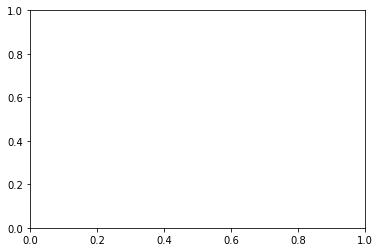

In [51]:
index_list = [i for i in range (1, len(move_count_rsults)+1)]
print(index_list,  mean_score)
print(sum(score_rsults)/len(score_rsults))

fig, ax = plt.subplots()
ax.plot(index_list, mean_score)

ax.set(xlabel='Partie', ylabel='score moyen',
       title='moyenne du score')
ax.grid()

plt.show()